In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline


In [3]:
df_index = pd.read_csv("economic_index.csv")


In [4]:
df_index.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [5]:
## drop_unneccessary columns
df_index.drop(columns=["Unnamed: 0","year", "month"], axis=1, inplace = True)

In [6]:
df_index.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [7]:
## checking null values 
df_index.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

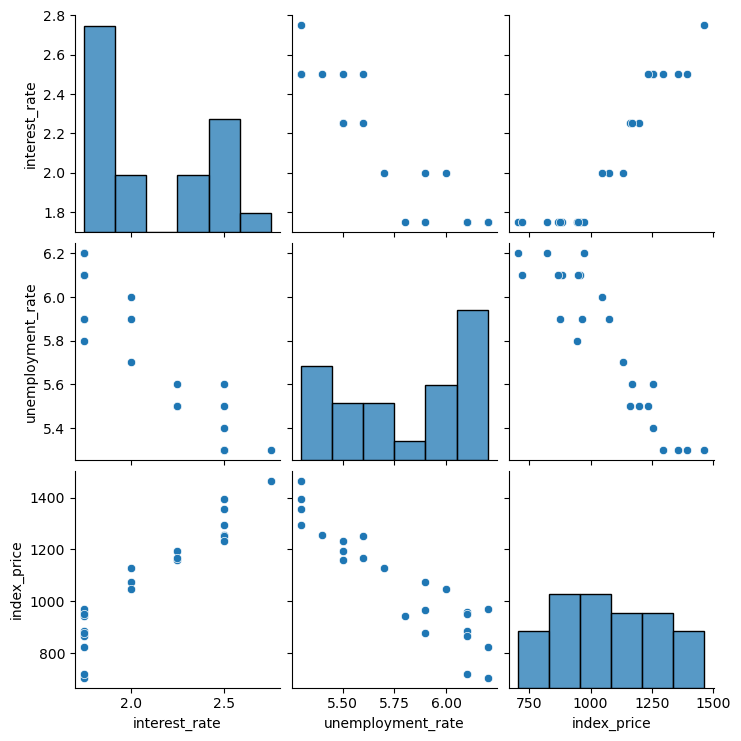

In [8]:
## lets do some visualization

import seaborn as sns
sns.pairplot(df_index)

In [9]:
df_index.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


Text(0, 0.5, 'unemployment_rate')

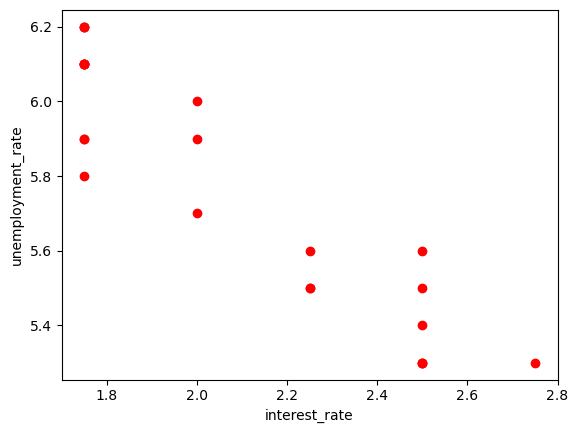

In [10]:
## visualize the datapoints more clearly
plt.scatter(df_index['interest_rate'],df_index['unemployment_rate'],color='r')
plt.xlabel("interest_rate")
plt.ylabel("unemployment_rate")

In [11]:
## independent and dependent feature 
x = df_index.iloc[:,:-1]
y = df_index.iloc[:,-1]
# x = df_index[['interest_rate', 'unemployment_rate']]

In [12]:
x.head()

,interest_rate,unemployment_rate
0,2.75,5.3
1,2.50,5.3
2,2.50,5.3
3,2.50,5.3
4,2.50,5.4


In [13]:
y

0     1464
1     1394
2     1357
3     1293
4     1256
5     1254
6     1234
7     1195
8     1159
9     1167
10    1130
11    1075
12    1047
13     965
14     943
15     958
16     971
17     949
18     884
19     866
20     876
21     822
22     704
23     719
Name: index_price, dtype: int64

In [14]:
## train and test split 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.25, random_state= 42)

In [15]:
import seaborn as sns


<Axes: xlabel='interest_rate', ylabel='index_price'>

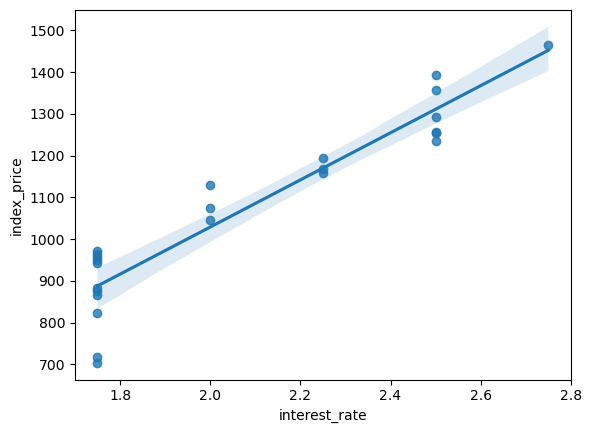

In [16]:
sns.regplot(x=df_index['interest_rate'], y=df_index['index_price'])


<Axes: xlabel='interest_rate', ylabel='unemployment_rate'>

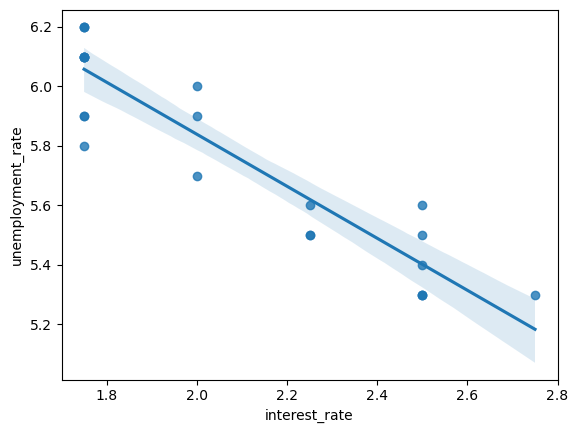

In [37]:
sns.regplot(x=df_index['interest_rate'], y=df_index['unemployment_rate'])

<Axes: xlabel='index_price', ylabel='unemployment_rate'>

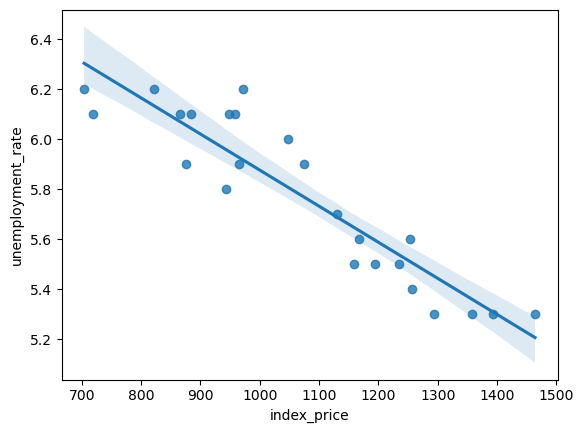

In [39]:
sns.regplot(x=df_index['index_price'], y=df_index['unemployment_rate'])

In [43]:
from sklearn.preprocessing import StandardScaler

In [47]:
scaler = StandardScaler()
x_train= scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [51]:
x_train

array([[-0.90115511,  0.37908503],
       [ 1.31077107, -1.48187786],
       [-0.90115511,  1.30956648],
       [ 1.31077107, -0.55139641],
       [ 1.31077107, -1.48187786],
       [-0.16384638,  0.68924552],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -1.48187786],
       [ 1.31077107, -1.17171738],
       [-0.90115511,  1.30956648],
       [-0.90115511,  0.999406  ],
       [-0.90115511,  0.37908503],
       [-0.90115511,  0.999406  ],
       [ 0.57346234, -0.8615569 ],
       [-0.16384638, -0.24123593],
       [-0.90115511,  0.06892455],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -0.8615569 ]])

In [55]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()

In [57]:
regression.fit(x_train, y_train)

LinearRegression()

## Cross Validation

In [59]:
from sklearn.model_selection import cross_val_score
validation_score = cross_val_score(regression, x_train, y_train, scoring = 'neg_mean_squared_error', cv=3)

In [63]:
np.mean(validation_score)


-5914.828180162396

In [66]:
## Prediction

In [72]:
y_predict = regression.predict(x_test)

In [74]:
y_predict

array([1180.7466813 ,  802.74279699, 1379.83457045,  838.52599602,
        973.85313963, 1144.96348227])

In [78]:
## Performance Matrics

from sklearn.metrics import mean_absolute_error, mean_squared_error

In [80]:
mse = mean_squared_error(y_test, y_predict)
mae = mean_absolute_error(y_test, y_predict)
rmse = np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

8108.567426306611
73.80444932337099
90.04758423359624


In [84]:
from sklearn.metrics import r2_score
score = r2_score(y_test, y_predict)
print(score)

## display adjusted R-Square
1- (1-score)* (len(y_test)-1)/ (len(y_test)- x_test.shape[1]-1)

0.7591371539010254


0.5985619231683756

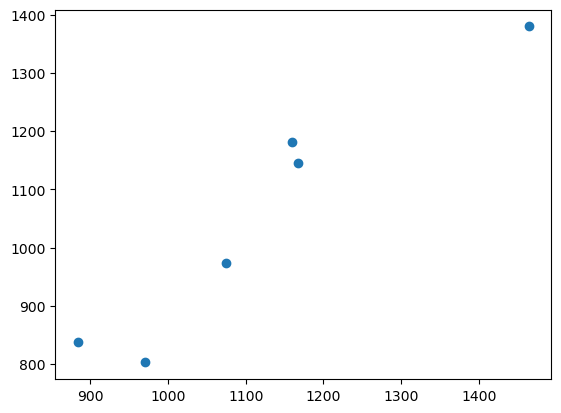

In [86]:
## Assumptionss
plt.scatter(y_test, y_predict)

In [88]:
residuals = y_test-y_predict
print(residuals)

8     -21.746681
16    168.257203
0      84.165430
18     45.474004
11    101.146860
9      22.036518
Name: index_price, dtype: float64


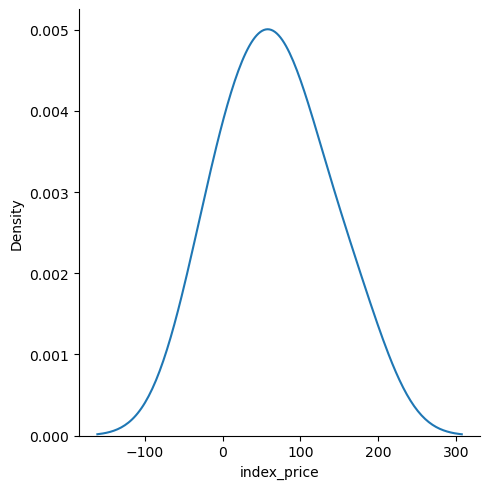

In [90]:
sns.displot(residuals, kind = 'kde')

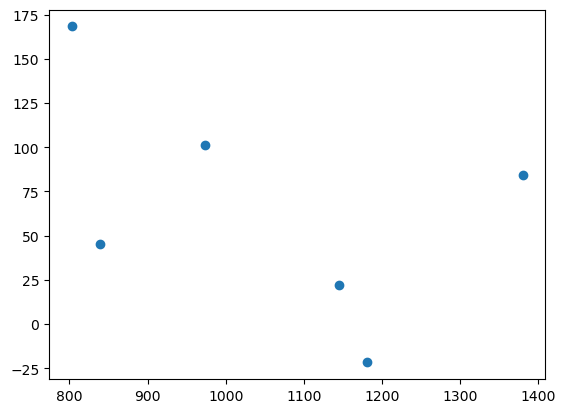

In [94]:
## Scatter plot with respect to prediction and residuals 
plt.scatter(y_predict, residuals)

In [98]:
## OLs linear Regression
import statsmodels.api as sm
model = sm.OLS(y_train, x_train).fit()


In [100]:
model.summary()

C:\Users\nikhil singh\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  res = hypotest_fun_out(*samples, **kwds)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            index_price   R-squared (uncentered):                   0.035
Model:                            OLS   Adj. R-squared (uncentered):             -0.086
Method:                 Least Squares   F-statistic:                             0.2880
Date:                Sun, 08 Dec 2024   Prob (F-statistic):                       0.754
Time:                        22:24:53   Log-Likelihood:                         -150.85
No. Observations:                  18   AIC:                                      305.7
Df Residuals:                      16   BIC:                                      307.5
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            88.2728    658.295      0.134      0.895   -1307.250    1483.796
x2          -116.2572    658.295     -0.177      0.862   -1511.780    1279.266
==============================================================================
Omnibus:                        0.598   Durbin-Watson:                   0.007
Prob(Omnibus):                  0.741   Jarque-Bera (JB):                0.567
Skew:                          -0.361   Prob(JB):                        0.753
Kurtosis:                       2.517   Cond. No.                         4.78
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [106]:
regression.coeff

AttributeError: 'LinearRegression' object has no attribute 'coeff'